C:\\Users\\User\Documents\GitHub\\2022_DA_ML_CaseStudies_Python_Keras\\5_Проверка статистических гипотез_Py

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>


# Проверка гипотезы нормальности распределения

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>

Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>

## Критерий Шапиро-Уилка. 

### Пример 1: Население городов СССР 

Кейс: Есть данные но количестве населения в городах Советского союза 60-х годов. Необходимо проверить гипотезу нормальности распределения выборки

Выборки независимые.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os
os.chdir("C:\\Users\\User\Documents\GitHub\\2022_DA_ML_CaseStudies_Python_Keras\\5_Проверка статистических гипотез_Py") # задаем рабочуюю директорию

In [3]:
df = pd.read_csv('town_1959_2.csv', encoding='cp1251')
df = df.set_index(u'номер')
df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


(array([  1.,   8.,  24., 127., 408., 302.,  88.,  33.,  11.,   2.]),
 array([-1.        , -0.52970528, -0.05941055,  0.41088417,  0.8811789 ,
         1.35147362,  1.82176835,  2.29206307,  2.7623578 ,  3.23265252,
         3.70294725]),
 <BarContainer object of 10 artists>)

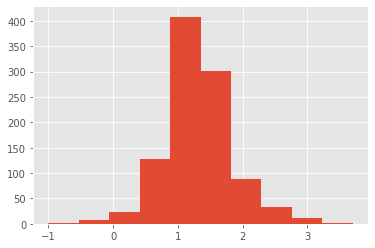

In [4]:
plt.hist(np.log10(df[u'население'])) # строим гистограмму

###### Примеряем критерий Шапиро-Уилка

Метод Шапиро-Уилка основан на вычислении показателя статистической значимости 'p-value'.

In [128]:
res = stats.shapiro(np.log10(df[u'население'])) # Команда вызова метода ШУ. указываем соответствующий столбец с данными
print('p-value: ', res[1])

p-value:  3.1486824866172602e-12


Значение p определяет вероятность попадания случайного значения в распределения. В нормальном распределении $ p > \alpha = 0.05 $. Если значение меньше, значит нормальное распределение отвергаем. 

##### Результат проверки:

p-value получился маленьким (меньше $\alpha = 0.01, 0.05$). 

H1: $X \nsim N(\cdot, \cdot)$<br>

##### Визуальный анализ:

А почему получилось не нормальное распределение? Гистограмма же была колоколообразной. Станет понятнее, если увеличить число столбцов:

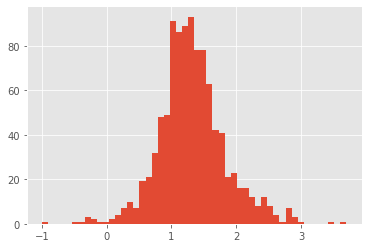

In [5]:
plt.hist(np.log10(df[u'население']), bins=50); # коливчество наблюдений

- Очевидно, что три выброса (один слева, два справа) являются аргументами, благодаря которым нормальность распределения не подтверждена. 
- Кроме того невооруженным глазом видно, что на верхних значениях "колоколообразность" также нарушена

##### Рекоммендации к дальнейшему анализу

Если убрать 2 или 3 переменых в результате выброса, то к этим данным можно применять критерий Стьюдента, потому как отклонение от нормальности будет несущественным. 

# Проверка гипотезы о равенстве средних значений

* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>

* Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
* Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>

## Метод Манна-Уитни. 

### Пример 2: Дома в Альбукерке

U-критерий Манна — Уитни (англ. Mann–Whitney U test) — статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.

Кейс: Дан набор данных, описывающий признаки домов. Необходимо оценить различия между двумя выборками по: критерий расположения дома на углу (COR). Хотим проверить, что цены домов на углу (COR = 1) отличаются от цен домов не на углу (COR = 0). 

Две выборки независимые.
Хотим попробовать применить критерий Стьюдента, но предварительно нужно: 

- Проверить нормальность распределения данных,
- Проверить равенство дисперсий


In [6]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Мы хотим применить критерий Стьюдента + Поступило новое задание "проверить средние цены". В обоих случаях прежде необходимо проверить распределение данных на нормальность, после чего переходить к проверке равенства дисерсий. 

##### Приведем в порядок датафрейм:

Очевидно, что значение -9999 здесь употребляется в качестве пустого значения. Нужно заменить его на корректное пустое значение non available '''nan'''

In [131]:
df = df.replace(-9999, np.nan) #  заменяем значение на более информативное "nan"
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Нас интересуют две группы домов: 1. на углу 2. не на углу. Первая группа у нас буде X со значением (1), вторая соответственно Y со значением (0)

##### Сохраним в отдельные переменные выборки, которые собираемся сравнивать:

In [7]:
x = df[df['COR'] == 1]['PRICE'] # на углу дома 
y = df[df['COR'] == 0]['PRICE'] # все остальные
x.name, y.name = 'corner', 'not corner'

##### Проверяем нормальность распределения данных:

In [8]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

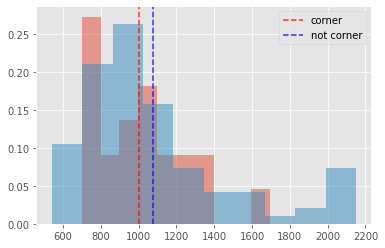

In [134]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

##### Визуальный анализ:

Как показывает гистограмма у нас есть существенные отклонения от нормальности распределения в выборке. В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (красной) гистограмме это не поможет. Выброс у неё всего один, и его удаление не сделает данные более нормальными: слишком уж большой крайний левый столбик. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (дома). Поэтому нам остаётся критерий Манна-Уитни.

Идея сравнивать две выборки по средним арифметическим не прошла. Значит сравниваем медианы при помощи теста Манна-Уитни:

###### Примеряем критерий Манна-Уитни:

In [9]:
res = stats.mannwhitneyu(x, y)  # Команда вызова метода МУ.
print('p-value:', res[1])

p-value: 0.8044081572425339


##### Результат проверки:

p-value получилось достаточно большим (больше $\alpha = 0.05$), поэтому у нас нет оснований отвергнуть гипотезу. Разница медиан в выборках случайна. Цены домов практически не различаются (статистические различия незначительны). 

H0: $\mu_1 = \mu_2$<br>

# Проверка гипотезы о равенстве дисперсий

* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>

## Критерий Флингера-Килина. 

### Пример 3: Продолжительность жизни

Кейс: Есть данные о возрасте, в котором умирали европейцы в середине 19 века, в зависимости от их класса (sovereignty, aristocracy, and gentry). Необходимо выяснить, насколько средний возраст продолжительности жизни отличается по этим трем группам. 

Две выборки независимые

Хотим попробовать применить критерий Стьюдента, но предварительно нужно: 

- Проверить нормальность распределения данных,
- Проверить равенство дисперсий

In [10]:
df = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None, names=['group', 'age', 'index'])
df.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


Хотим попробовать применить критерий Стьюдента для двух независимых выборок: 

##### Сохраним в отдельные переменные выборки, которые собираемся сравнивать:

Нас интересуют две категории граждан: 1. короли (sovr = X) 2. аристократы (aris = Y):

In [11]:
x = df[df['group'] == 'sovr']['age']
y = df[df['group'] == 'aris']['age']
x.name, y.name = 'sovr', 'aris'

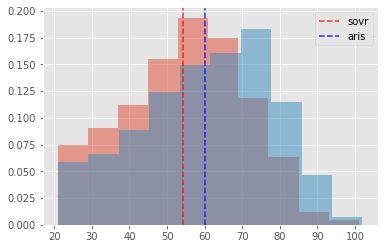

In [138]:
two_histograms(x, y) # строим соответственно 2 гистограммы:

##### Визуальный анализ:

Выбросов нет, ассиметрии сильной тоже нет, колоколообразность сохранена => Данные условно нормальны => критерием Стьюдента (t-критерий) можно пользоваться.  

Но прежде проверим c помощью критерия Флигнера-Килина, равны ли дисперсии.

###### Примеряем критерий Флингера-Килина:

In [12]:
res = stats.fligner(x, y) # Команда вызова метода ФК.
print('p-value: ', res[1])

p-value:  0.00010116077103844913


##### Результат проверки:

Значение p-value низкое, поэтому гипотезу о равенстве дисперсий отвергаем. 

H1: $\sigma_1 \neq \sigma_2$<br>

В двух выборках находятся разные наблюдаемые объекты, то есть выборки несвязные. Итого, гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=False```. Это означает, что будет использоваться та версия t-критерия Стьюдента, которая не предполагает равенство дисперсий:

In [13]:
res = stats.ttest_ind(x, y, equal_var=False)
print ('p-value: ', res[1])

p-value:  1.5181184197728794e-26


Вывод: т.к. p-значение меньше $\alpha = 0.01, 0.05$, гипотезы о равенстве дисперсий отвергаются => продолжительность жизни королей различаются => переменная статистически значима. 

## Критерий Стьюдента для парных выборок. 

### Пример 4: Цвет шрифта

* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>

Кейс: Исследование 1935 года, в котором изучалась скорость чтения названий цветов в зависимости от того, шрифт какого цвета использовался. В ходе каждого теста суммировалось время, потраченное на прохождение теста. Необходимо выяснить, насколько участники эксперементов смогли абстрагироваться от цвета букв. Влияло ли несоответствие цвета шрифта маркировке текста на скорость реакции?y

Еслидо этого выборки были независимы, то в этом примере они парные (один и тот же человек проходит тест)

Хотим попробовать применить критерий Стьюдента, но предварительно нужно: 

In [14]:
df = pd.read_csv('interference.csv')
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


##### Сохраним в отдельные переменные выборки, которые собираемся сравнивать:

Нас интересуют две группы  1. Изменяющиеся цвета шрифта (Diffcoll) = X 2. Неизменяющийся черный шрифт (Black) = Y. 

In [142]:
x = df['DiffCol'] # Изменяющиеся цвета шрифта
y = df['Black'] # Неизменяющийся черный шрифт
x.name, y.name = 'DiffCol', 'Black'

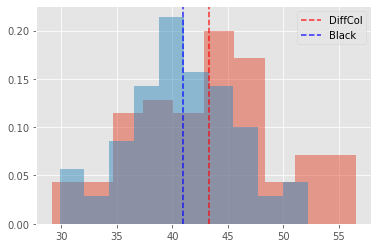

In [143]:
two_histograms(x, y)

##### Визуальный анализ:

Выбросов нет, ассиметрии сильной тоже нет, колоколообразность сохранена => Данные условно нормальны. Критерием Стьюдента можно пользоваться.   



##### Применяем критерий Стьюдента

Поскольку в наблюдениях содержатся одни и те же люди, которых просили прочитать различные шрифты, поэтому выборки у нас связные, а значит используем ttest_rel.

In [23]:
res = stats.ttest_rel(x, y) # Команда вызова метода ФК
print('p-value: ', res[1])

p-value:  1.0210464321173577e-43


##### Результат проверки:

p-value получился довольно низким ($\alpha = 0.01, 0.05$), но возможно не таким низким, как хотелось бы.

На уровне значимости 0.05 гипотеза будет отвергнута:

H0: $\mu = M$<br>

но на уровне 0.01 уже нет. 

H1: $\mu \ne M$<br>

Решение за исследователем. Всё зависит от того, насколько сильно мы боимся ошибки первого рода, насколько сильно мы должны ручаться за выводы.

# Проверка гипотезы однородности

* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>

## Метод Хи-квадрат. 

### Пример 5: Популярность кандидата

Кейс: врегионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе.
 
- Проверять будем критерием хи-квадрат. 
- Сначала построим таблицу сопряжённости.

##### Строим таблицу сопряженности:

In [24]:
contingency_table = pd.DataFrame([[28, 72], [20, 80]],
                                 index=['city', 'country'],
                                 columns=['for', 'against'])
contingency_table

,for,against
city,28,72
country,20,80


Необходимо выяснить, однородна ли поддержка (За/Против) кандидата в городе (city) и в сельской местности (country)

###### Примеряем метод Хи-квадрат

In [17]:
res = stats.chi2_contingency(contingency_table) # Команда вызова метода Хи-квадрат
print ('p-value: {0}'.format(res[1]))

p-value: 0.2464701206916715


##### Результат проверки:

p-value получился достаточно большим, поэтому оснований отвергнуть гипотезу о равенстве долей нет:
    
$ H_{0}: p_1 = p_2$<br> 

К слову сказать: Метод Хи-квадрат, применяемый для оценки однородности, широко применяется в А\Б тестировании и является критерием оценки ДО/ПОСЛЕ в тех случаях, когда нужно найти ответ из категории ДА/НЕТ. Например: Изменит ли количество зарегистрированных пользователей изменение в дизайне лендинга? (Этот метод часто применяла Марисса Мейер, когда отстаивала непоколебиимость дизайна главной страницы Гугла перед всеми попытками изменить главную концепцию, сделавшую Гугл своей визитной карточкой. 

#  Проверка гепотезы о независимости (корреляция)

* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>


## Критерий Пирсона / Критерий Спирмена. 

### Пример 6: Площадь и цена домов в Альбукерке

Из всех методов корреляционного анализа наиболее популярны оба этих критерия. Причина популярности в их применимости относительно нормальности / ненормальности распределения. А так же относительно непрерывности  величин

Применям Коэффициент Пирсона: распределение нормальное; величины непрерывные
Применяем коэффициент Спримена: распределение ненормальное; величины дискретные


Кейс: Дан набор данных, описывающий признаки домов. Необходимо оценить есть ли корреляция между площадью (SQFT) и ценой (PRICE). 

In [18]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [19]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


##### Проверим корреляцию предикторов: 

Проверим очевидный факт, что площадь дома коррелирует с его ценой.

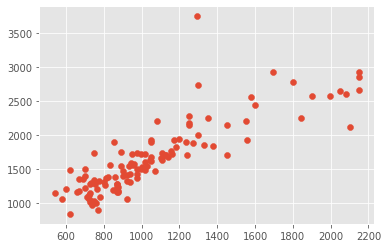

In [20]:
plt.scatter(df['PRICE'], df['SQFT'])  # Два предиктора

Очевидно, что линейная зависимость (корреляция) двух предикторов есть

##### Проверим выборки на нормальность распределения: 

In [21]:
x = df['PRICE'] # Цена
y = df['SQFT'] # Площадь
x.name, y.name = 'PRICE', 'SQFT'

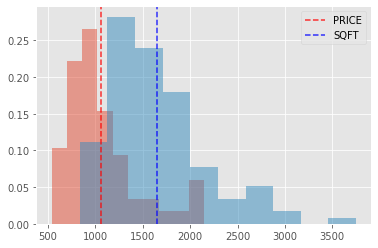

In [151]:
two_histograms(x, y)

##### Визуальный анализ:

Выбросов нет, ассиметрии сильной тоже нет, колоколообразность сохранена => Данные условно нормальны => Критерий Пирсона.   

###### Примеряем критерий Пирсона: 

In [22]:
res = stats.pearsonr(df['PRICE'], df['SQFT']) # Команда вызова критерия Пирсона
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8447950985552122
p-value:  5.1463457076294135e-33


##### Результат проверки:

p-value получился достаточно большим, поэтому оснований принять гипотезу о независимости нет:
    
H1: X и Y зависимы<br>

Pearson rho (коэффициент корреляции Пирсона) $ \rho > 0,75 $ => Корреляция сильная => Статистической значимостью одного из предикторов можно пренебречь